In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

df.head()

,Scan Sweep Time (Sec),Scan Number,101Time (Sec),101 (°C),102Time (Sec),102 (°C),103Time (Sec),103 (°C),104Time (Sec),104 (°C),...,113Time (Sec),113 (°C),114Time (Sec),114 (°C),115Time (Sec),115 (°C),116Time (Sec),116 (°C),117Time (Sec),117 (Vac)
0,2024-09-16 08:32:41.540,1,2024-09-16 08:32:41.540,16.674,2024-09-16 08:32:41.580,15.509,2024-09-16 08:32:41.619,15.547,2024-09-16 08:32:41.658,15.579,...,2024-09-16 08:32:42.009,15.747,2024-09-16 08:32:42.047,16.946,2024-09-16 08:32:42.086,16.908,2024-09-16 08:32:42.125,17.020,2024-09-16 08:32:43.323,0.000132
1,2024-09-16 08:32:51.525,2,2024-09-16 08:32:51.525,16.786,2024-09-16 08:32:51.564,15.502,2024-09-16 08:32:51.603,15.601,2024-09-16 08:32:51.642,15.617,...,2024-09-16 08:32:51.992,15.758,2024-09-16 08:32:52.031,16.964,2024-09-16 08:32:52.070,16.858,2024-09-16 08:32:52.109,16.987,2024-09-16 08:32:53.307,0.000131
2,2024-09-16 08:33:01.529,3,2024-09-16 08:33:01.529,16.695,2024-09-16 08:33:01.568,15.425,2024-09-16 08:33:01.607,15.558,2024-09-16 08:33:01.646,15.600,...,2024-09-16 08:33:01.996,15.799,2024-09-16 08:33:02.035,17.001,2024-09-16 08:33:02.074,16.927,2024-09-16 08:33:02.113,16.961,2024-09-16 08:33:03.311,0.000133
3,2024-09-16 08:33:11.526,4,2024-09-16 08:33:11.526,16.673,2024-09-16 08:33:11.565,15.523,2024-09-16 08:33:11.603,15.545,2024-09-16 08:33:11.642,15.597,...,2024-09-16 08:33:11.993,15.776,2024-09-16 08:33:12.032,16.991,2024-09-16 08:33:12.071,16.954,2024-09-16 08:33:12.110,16.988,2024-09-16 08:33:13.308,0.000134
4,2024-09-16 08:33:21.525,5,2024-09-16 08:33:21.525,16.766,2024-09-16 08:33:21.564,15.558,2024-09-16 08:33:21.604,15.587,2024-09-16 08:33:21.643,15.627,...,2024-09-16 08:33:21.993,15.762,2024-09-16 08:33:22.032,16.953,2024-09-16 08:33:22.071,16.946,2024-09-16 08:33:22.110,17.062,2024-09-16 08:33:23.308,0.000136


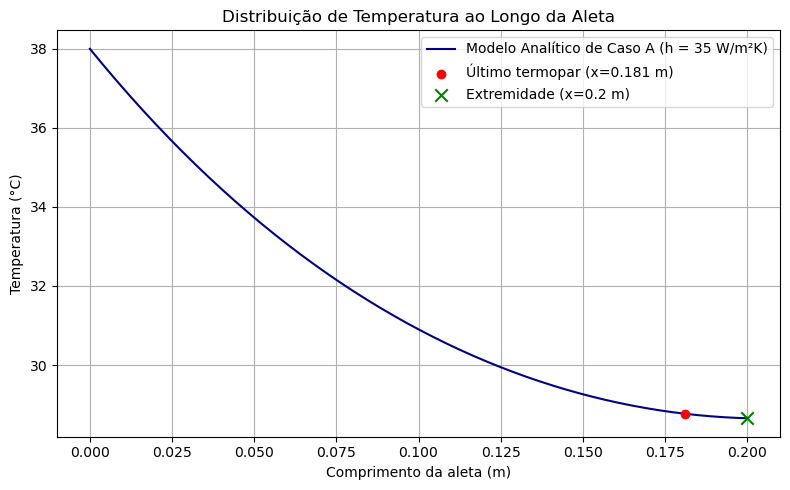

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# Exemplo de ajuste conforme a Figura 3 (Projeto 1)
#------------------------------------------------------------------------------
# ATENÇÃO: Ajuste as variáveis de entrada (T_base, T_amb, etc.)
# de acordo com as medições reais do seu experimento ou planilha.
#------------------------------------------------------------------------------

# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

# Temperaturas (conforme seu experimento)
T_amb  = 18.0        # Ajuste conforme medição real
T_base = 38.0        # Ajuste conforme medição real

# 2) Propriedades do material
k = 160  # [W/m.K] (Alumínio 2014 aproximado)
h = 35   # [W/m².K] estimativa de convecção forçada

# 3) Dimensões da aleta conforme desenho:
#    - Comprimento total ~ 200 mm
#    - Diâmetro nominal ~ 24 mm
L = 0.20      # metros (200 mm)
D = 0.024     # metros (24 mm)
Ac = np.pi*(D/2)**2  # área de seção transversal [m²]
P  = np.pi*D         # perímetro lateral [m]

# 4) Posição do último termopar
#    Conforme o desenho, o último furo está a 181 mm da base esquerda
x_ultimo_termopar = 0.181  # em metros

# 5) Cálculo do parâmetro m
m = np.sqrt( (h * P) / (k * Ac) )

# 6) Solução analítica da distribuição de temperatura
#    (regime estacionário, com T(0)=T_base e convecção na ponta x=L)
x = np.linspace(0, L, 200)

# Excesso de temperatura (theta) = (T - T_amb)
numerador   = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
denominador = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta       = numerador / denominador

# Temperatura absoluta
T_analitico = T_amb + (T_base - T_amb)*theta

# 7) Temperatura no último termopar e na extremidade (ponta) da aleta
T_no_ultimo_termopar  = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade         = T_analitico[-1]  # valor em x=L

# 8) Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico de Caso A (h = {h} W/m²K)", color="darkblue")

# Marcar posição do último termopar
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Marcar extremidade
plt.scatter(L, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={L} m)")

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------
# Observações:
# - O valor de L=0.20 m reflete a dimensão de 200 mm total no desenho.
# - O diâmetro D=0.024 m (24 mm) foi estimado pelo projeto (Figura 3).
# - A posição do último termopar (x=0.181 m) corresponde aos 181 mm indicados.
# - Ajuste T_base, T_amb, h etc. conforme o seu experimento real.
#------------------------------------------------------------------------------
